Multivariable pairing (RGA)
===========================

For a 2$\times$2 system, we have 2 choices of pairing variables for distributed control:

<table style="border-style: hidden">
<tr><td>Diagonal</td><td>Off-diagonal</td></tr>
<tr><td><img src="assets/mimo2x2.png" width="80%"></td><td><img src="assets/mimo2x2_off_diagonal.png" width="80%"></td></tr>
<tr><td>$$G_{cd} = \left[\begin{array}{cc} G_{c1} & 0 \\ 0 & G_{c2} \end{array}\right]$$</td><td>$$G_{co} = \left[\begin{array}{cc} 0 & G_{c2} \\ G_{c1} & 0 \end{array}\right]$$</td></tr>
</table>

RGA
---

Bristol developed the Relative Gain Array to determine good pairings based on only the plant transfer function matrix $G_p$. The elements of the RGA are defined as

$$\lambda_{ij} \triangleq = \frac{(\partial y_i/\partial u_j)_u}{(\partial y_i/\partial u_j)_y}= \frac{\text{open loop gain}}{\text{closed loop gain}}$$

We could build $\Lambda$ by direct evaluation of the above derivatives near some point given a time-domain model, but if we already have a transfer function model, we can evaluate the steady-state gain matrix $K$ by using the final value theorem.

In [1]:
import sympy
sympy.init_printing()

In [2]:
s = sympy.Symbol('s')

In [3]:
def fopdt(k, theta, tau):
    return k*sympy.exp(-theta*s)/(tau*s + 1)

Using the system from example 16.5

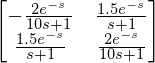

In [4]:
G_p = sympy.Matrix([[fopdt(-2, 1, 10), fopdt(1.5, 1, 1)],
                    [fopdt(1.5, 1, 1), fopdt(2, 1, 10)]])
G_p

Unfortunately SymPy doesn't allow us to calculate limits on matrices all at once.

In [5]:
#sympy.limit(G_p, s, 0)

But we can apply a function to the elements

In [6]:
def gain(G):
    return sympy.limit(G, s, 0)

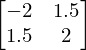

In [7]:
K = G_p.applyfunc(gain)
K

We can then calculate $\Lambda = K \otimes H$ where $H = (K^{-1})^{T}$:

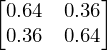

In [8]:
Lambda = K.multiply_elementwise(K.inv().transpose())
Lambda

We can do the same calculation (faster) using numpy:

In [9]:
import numpy

In [10]:
def fopdt(k, theta, tau):
    return k*numpy.exp(-theta*s)/(tau*s + 1)

In [11]:
s = 0

In [12]:
K = numpy.matrix([[fopdt(-2, 1, 10), fopdt(1.5, 1, 1)],
                  [fopdt(1.5, 1, 1), fopdt(2, 1, 10)]])

The `.A` attribute in matrices is the matrix as a `numpy.array`, which multiplies elementwise by default.

In [13]:
K.A*K.I.T.A

array([[ 0.64,  0.36],
       [ 0.36,  0.64]])